In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [187]:
df = pd.read_csv('diabetes_data.csv')
df.head(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential
5,6005,65,0,0,0,0,15.820815,1,17.781024,9.252522,...,0,86.378969,0,0,0,1.535161,9.682226,2.744281,0,Confidential
6,6006,61,1,2,1,3,20.075147,0,1.086479,8.745650,...,0,86.036931,0,0,0,0.578208,1.175504,1.229453,0,Confidential
7,6007,74,1,3,0,3,29.438938,0,6.187378,9.114535,...,0,47.315820,0,0,0,1.659424,2.258377,9.035877,0,Confidential
8,6008,54,0,0,1,2,15.027557,0,19.505734,0.590771,...,0,88.638130,0,0,0,3.675916,2.006186,3.452805,1,Confidential
9,6009,82,1,0,1,1,34.300044,1,15.943844,6.056621,...,0,96.636541,0,0,0,2.567315,4.031643,2.633287,0,Confidential


In [152]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


#### Continuous Variables

- **Age**
- **BMI**
- **AlcoholConsumption**
- **PhysicalActivity**
- **DietQuality**
- **SleepQuality**
- **SystolicBP**
- **DiastolicBP**
- **FastingBloodSugar**
- **HbA1c**
- **SerumCreatinine**
- **BUNLevels**
- **CholesterolTotal**
- **CholesterolLDL**
- **CholesterolHDL**
- **CholesterolTriglycerides**
- **FatigueLevels**
- **QualityOfLifeScore**
- **MedicalCheckupsFrequency**
- **HealthLiteracy**
- **MedicationAdherence** *(target)*

---

#### Discrete (Categorical/Binary) Variables

- **Gender**
- **Ethnicity**
- **SocioeconomicStatus**
- **EducationLevel**
- **Smoking**
- **FamilyHistoryDiabetes**
- **GestationalDiabetes**
- **PolycysticOvarySyndrome**
- **PreviousPreDiabetes**
- **Hypertension**
- **AntihypertensiveMedications**
- **Statins**
- **AntidiabeticMedications**
- **FrequentUrination**
- **ExcessiveThirst**
- **UnexplainedWeightLoss**
- **BlurredVision**
- **SlowHealingSores**
- **TinglingHandsFeet**
- **HeavyMetalsExposure**
- **OccupationalExposureChemicals**
- **WaterQuality**
- **Diagnosis**


#### Given that medical adherence is our target variable, we will first make a distribution plot to see how it is distributed.

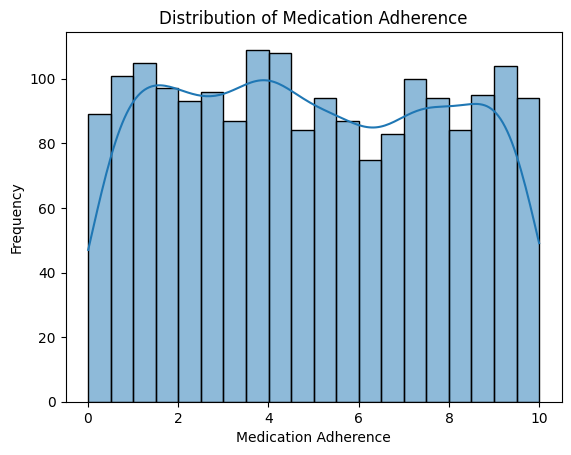

In [181]:
sns.histplot(df, x='MedicationAdherence', bins=20, kde=True)
plt.title('Distribution of Medication Adherence')
plt.xlabel('Medication Adherence')
plt.ylabel('Frequency')
plt.show()

#### In healthcare and the pharmaceutical industry, setting the adherence threshold at 6.0 out of 10 strikes a meaningful balance between clinical relevance and real-world actionability. Patients who score below this level are often considered at risk of not receiving the full benefit of their treatment, which can lead to worse health outcomes and higher healthcare costs. Companies like Eli Lilly, along with healthcare providers, focus heavily on identifying and supporting these patients early. By using a threshold of 6.0, we’re capturing those who show moderate or lower commitment to their medication regimen — the group most likely to benefit from targeted interventions like education, reminders, or personalized support. This approach mirrors how adherence is often handled in real-world disease management programs, making the model both practical and aligned with industry priorities.

AdherenceLabel
0    950
1    929
Name: count, dtype: int64


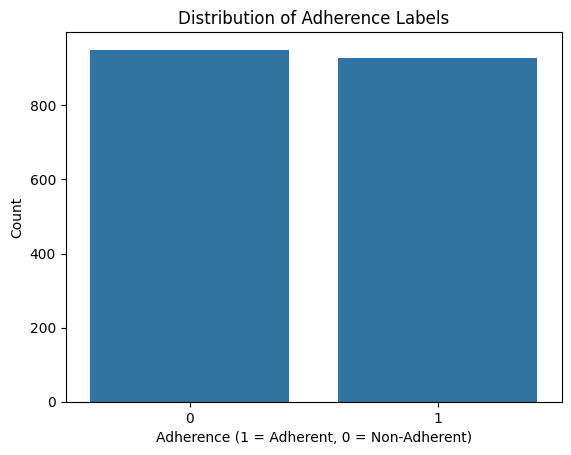

In [188]:
def preprocess_adherence_data(df, threshold=4.9, plot=True):
  
    # Step 1: Create the binary label
    df['AdherenceLabel'] = (df['MedicationAdherence'] >= threshold).astype(int)

    columns_to_drop = ['PatientID', 'DoctorInCharge']
    df = df.drop(columns_to_drop, axis=1)

    # Step 2: Drop the original MedicationAdherence column (always)
    df = df.drop(columns=['MedicationAdherence'])

    # Step 3: Plot the distribution if requested
    if plot:
        print(df['AdherenceLabel'].value_counts())
        sns.countplot(x='AdherenceLabel', data=df)
        plt.title('Distribution of Adherence Labels')
        plt.xlabel('Adherence (1 = Adherent, 0 = Non-Adherent)')
        plt.ylabel('Count')
        plt.show()

    return df

df = preprocess_adherence_data(df, threshold=4.9, plot=True)

#### We can see that there are multi categorical variables such as ethnicity, socioeconomic status, and education level. We can use one hot encoding to convert these categorical variables into numerical variables.

In [189]:
# List of multi-categorical variables to encode
multi_categoricals = ['Ethnicity', 'SocioeconomicStatus', 'EducationLevel']

# One-hot encode
df = pd.get_dummies(df, columns=multi_categoricals, drop_first=True)

print(df.shape)
df.head()


(1879, 49)


,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryDiabetes,GestationalDiabetes,...,Diagnosis,AdherenceLabel,Ethnicity_1,Ethnicity_2,Ethnicity_3,SocioeconomicStatus_1,SocioeconomicStatus_2,EducationLevel_1,EducationLevel_2,EducationLevel_3
0,44,0,32.985284,1,4.499365,2.443385,4.898831,4.049885,1,1,...,1,0,True,False,False,False,True,True,False,False
1,51,1,39.916764,0,1.578919,8.301264,8.941093,7.508150,0,0,...,1,1,False,False,False,True,False,False,True,False
2,89,1,19.782251,0,1.177301,6.103395,7.722543,7.708387,1,0,...,0,1,False,False,False,True,False,False,False,True
3,21,1,32.376881,1,1.714621,8.645465,4.804044,6.286548,1,1,...,0,0,True,False,False,True,False,False,True,False
4,27,1,16.808600,0,15.462549,4.629383,2.532756,9.771125,0,0,...,0,1,False,False,False,True,False,False,False,True


#### Defining Features (X) and Target (y)

In [190]:
X = df.drop(columns=['AdherenceLabel'])
y = df['AdherenceLabel'] 

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1879, 48)
Shape of y: (1879,)


In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Quick check
print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(1503, 48) (376, 48)
AdherenceLabel
0    0.505655
1    0.494345
Name: proportion, dtype: float64
AdherenceLabel
0    0.505319
1    0.494681
Name: proportion, dtype: float64


#### Initial Model (without any hyperparameter tuning)

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the model
rf = RandomForestClassifier(random_state=42)

# Step 2: Fit the model
rf.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf.predict(X_test)

# Step 4: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5345744680851063
Confusion Matrix:
 [[102  88]
 [ 87  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       190
           1       0.53      0.53      0.53       186

    accuracy                           0.53       376
   macro avg       0.53      0.53      0.53       376
weighted avg       0.53      0.53      0.53       376



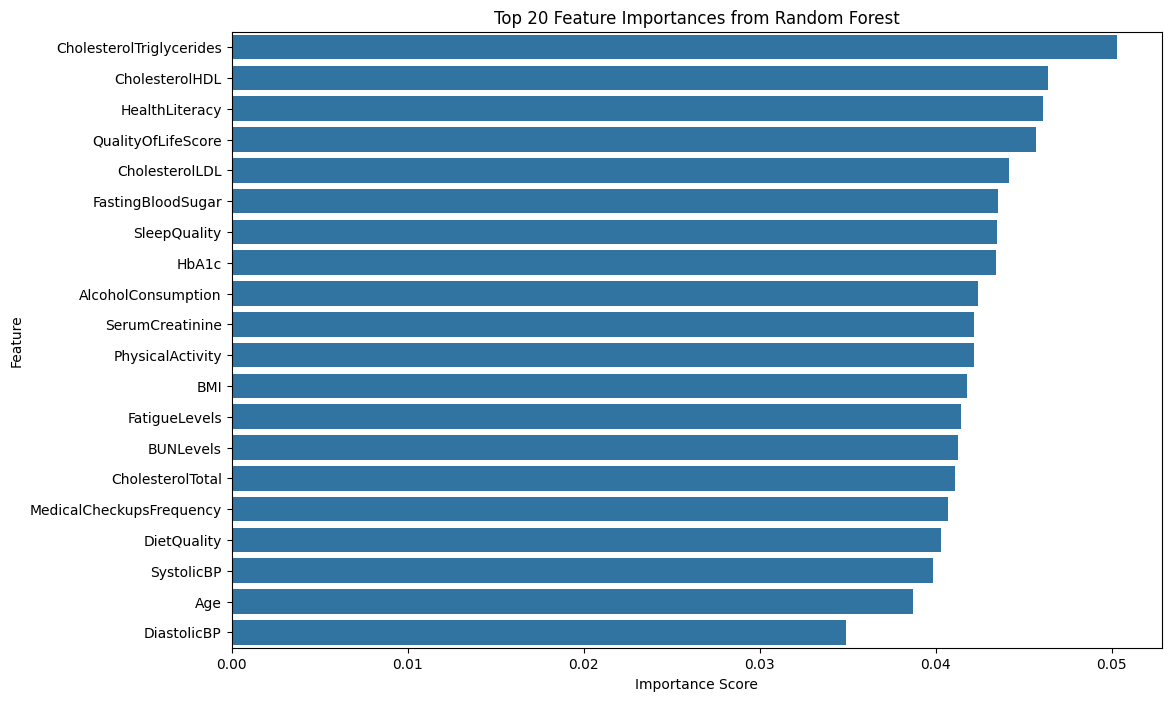

                          feature  importance
22       CholesterolTriglycerides    0.050315
21                 CholesterolHDL    0.046402
38                 HealthLiteracy    0.046113
33             QualityOfLifeScore    0.045726
20                 CholesterolLDL    0.044153
15              FastingBloodSugar    0.043562
7                    SleepQuality    0.043511
16                          HbA1c    0.043449
4              AlcoholConsumption    0.042402
17                SerumCreatinine    0.042201
5                PhysicalActivity    0.042182
2                             BMI    0.041787
29                  FatigueLevels    0.041423
18                      BUNLevels    0.041283
19               CholesterolTotal    0.041083
37       MedicalCheckupsFrequency    0.040712
6                     DietQuality    0.040314
13                     SystolicBP    0.039837
0                             Age    0.038704
14                    DiastolicBP    0.034883
23    AntihypertensiveMedications 

In [193]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot Top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print full table if you want
print(feature_importances)

In [194]:
features_to_drop = feature_importances[feature_importances['importance'] <= 0.001]['feature'].tolist()

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)


#### 2nd Model (after feature importance analysis)

In [195]:
# Step 1: Re-initialize the model
rf = RandomForestClassifier(random_state=42)

# Step 2: Re-fit the model
rf.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf.predict(X_test)

# Step 4: Evaluate the new model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5345744680851063
Confusion Matrix:
 [[102  88]
 [ 87  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       190
           1       0.53      0.53      0.53       186

    accuracy                           0.53       376
   macro avg       0.53      0.53      0.53       376
weighted avg       0.53      0.53      0.53       376



#### 3rd Model (after hyperparameter tuning)

In [196]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],         # Number of trees
    'max_depth': [None, 5, 10, 20, 30],                # Maximum tree depth
    'min_samples_split': [2, 5, 10],                   # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],                  # Number of features considered at each split
    'class_weight': ['balanced', None]                 # Balance the classes if needed
}

In [197]:
# Re-initialize a fresh random forest model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,                 # Try 50 combinations
    cv=5,                      # 5-fold cross-validation
    verbose=2,                 # Print progress
    random_state=42,           # For reproducibility
    n_jobs=-1                  # Use all available CPU cores
)

In [198]:
# Fit the RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [199]:
# Best model from RandomizedSearchCV
best_rf = rf_random_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5452127659574468
Confusion Matrix:
 [[106  84]
 [ 87  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.55       190
           1       0.54      0.53      0.54       186

    accuracy                           0.55       376
   macro avg       0.55      0.55      0.55       376
weighted avg       0.55      0.55      0.55       376



#### 4th Model (further hyperparameter tuning)